# Laboratory 9 - Pipeline Transients

:::{admonition} Course Website
[http://54.243.252.9/ce-3105-webroot/](http://54.243.252.9/ce-3105-webroot/)
:::

## Readings 

1. [Julien, P. Y. (2022) pp. 109-140 from *Essentials of Hydraulics*. Cambridge University Press. ISBN 978-1-108-81630-4. DOI: 10.1017/9781108907466](http://54.243.252.9/ce-3105-webroot/ce3105notes/lessons/laboratory9/Essentials_of_Hydraulics.pdf)

2. [Crowe, C. T., Elger, D. F. , Williams, B.C., Roberson, J. A. (2009). pp 187-192 from *Engineering Fluid Mechanics, 9th Edition*. J. Wiley & Sons. ISBN 0-471-66161-9](http://54.243.252.9/ce-3105-webroot/ce3105notes/lessons/laboratory9/Crowe-et-al.-2009-Engineering-Fluid-Mechnaics-Excerpt.pdf)

3.  [Koutitas, C. G. (1983) pp. 55-64 from *Elements of computational hydraulics*. Pentech Press](http://54.243.252.9/ce-3105-webroot/ce3105notes/lessons/laboratory9/ElementsOfComputationalHydraulicsExcerpt.pdf)

<!--2. [Gupta, R.S., 2017. Hydrology and Hydraulic Systems, pp 668](https://www.waveland.com/browse.php?t=384) This is usually the CE 3354/3372 Textbook -->



## Videos

1. [none](https://www.youtube.com/watch?v=9NYs3Y-IjGw)

## Lesson Outline
1. Background
2. Rigid Column Theory
3. Elastic Pipe Theory
4. Calculations

## Background
Unsteady flow in closed conduits is important for estimating the forces involved from a sudden change in discharge from a pump failing (or starting), or the closing (or opening) of a valve. The flow variation will create a pressure wave traveling along the pipe.

:::{note} 
These waves will travel in alternating directions as they find boundaries as each end of the disturbed discharge conduit -- in some sense the pipeline becomes a resonant chamber.  Over time the magnitude of the waves will decrease as friction dissipates the energy.  During these transients high and low pressures are applied to the pipe walls and fixtures and can concievably damage them.
:::

The engineering/computational goal is to estimate the magnitude and timing of these extreme pressures to evaluate the safety of the conduit, or design a pump shutdown (or startup) or valve operation protocol to control these extreme pressures to some acceptable magnitude.

## Rigid Column Theory 
Rigid column theory models the behavior of fluid in a pipeline during transient events (e.g., valve closures or pump starts/stops) by assuming:
- The fluid is incompressible.
- The pipe walls are rigid.
- Transients are dominated by inertial and frictional forces.

The theory provides a simplified framework to estimate maximum and minimum pressures and velocities during transient conditions, primarily for short pipelines or slow transient processes.

### Relevant Equations 

- Continuity Equation:
   $Q=A \cdot v$

   Where: 
   
   $Q$: is the flow rate ($\frac{m^3}{s}$), 
   
   $A$: is the cross-sectional area of the pipe ($m^2$), and 
   
   $v$: is the velocity of the fluid ($\frac{m}{s}$)

- Momentum Equation: The change in velocity over time is governed by:

    $\rho L \frac{dv}{dt}=(P_1 - P_2) - \frac{f \rho v^2 L}{2D}$

    Where:
        
    $\rho$: is the fluid density ($\frac{kg}{m^3}),
    
    $L$: is the length of the pipeline ($m$),
    
    $P_1,P_2$: are pressures at the upstream and downstream ends ($Pa$)
    
    $f$: is the Darcy-Weisbach friction factor (dimensionless)
    
    $D$: is the pipe diameter ($m$)
    
- Head Loss Due to Friction:
    
    $h_f=f\frac{L}{D}\frac{v^2}{2g}$

    Where:
        
    $h_f$: is the friction loss ($m$), and
        
    $g$: is the gravitational acceleration ($9.81 \frac{m}{s^2})

- Pressure-Head Relationship:

    $P=\rho g H$

    Where:
        
    $H$: Pressure head ($m$)

- Maximum and Minimum Pressures:

  During a transient event (e.g., sudden valve closure), the fluid velocity changes rapidly, leading to variations in pressure. 
  The maximum pressure can be estimated using:

  - Maximum Pressure at the Upstream End:
    
    $P_{max}=P_{static}+\rho v_0 \frac{L}{t_{close}}$
    
    Where:
        
    $P_{static}$: is the static pressure ($Pa$)
    
    $v_0$: is the initial velocity ($\frac{m}{s}$)
    
    $t_{close}$: is the valve closure time ($s$)

  - Minimum Pressure at the Downstream End:
    
    $P_{max}=P_{static}-\rho v_0 \frac{L}{t_{close}}$
    
### Engineering Applications:

- Pipeline Design for Pressure Ratings: Use PmaxPmax​ to ensure the pipe material can withstand transient pressures.

- Mitigation Strategies: Estimate $t_{close}$ (closure time) to minimize pressure surges: Gradual valve closures reduce $P_{max}$.

- Determine Safety Margins: Incorporate a factor of safety to $P_{max}$ to account for unanticipated conditions, like partial blockages or additional friction.

### Example Calculation:

A steel pipeline (diameter $D=0.5 m$, length $L=500 m$) carries water ($\rho=1000 kg/m^3$) at an initial velocity of $v_0=2.0 m/s$. The valve is closed linearly over $t_{close}=5 s$. Static pressure is $P_{static}=2.0 bar$.

In [1]:
# Rigid Column Calculations

def rigid_column_pressure(length, diameter, rho, v_initial, t_close, p_static):
    """
    Calculate maximum and minimum pressures for a rigid column in a pipeline.
    
    Parameters:
        length (float): Length of the pipeline (m).
        diameter (float): Diameter of the pipeline (m).
        rho (float): Density of the fluid (kg/m^3).
        v_initial (float): Initial velocity of the fluid (m/s).
        t_close (float): Valve closure time (s).
        p_static (float): Static pressure (Pa).
    
    Returns:
        tuple: Maximum and minimum pressures (Pa).
    """
    # Compute maximum and minimum pressures
    p_max = p_static + rho * v_initial * (length / t_close)
    p_min = p_static - rho * v_initial * (length / t_close)
    
    return p_max, p_min


# Input values
length = 500.0  # m
diameter = 0.5  # m
rho = 1000.0  # kg/m^3
v_initial = 2.0  # m/s
t_close = 5.0  # s
p_static = 2.0e05  # Pa (1 bar = 100,000 Pa)

# Perform calculations
p_max, p_min = rigid_column_pressure(length, diameter, rho, v_initial, t_close, p_static)

# Output results with right justification
print(f"{'Maximum Pressure:':<20} {p_max:>15.3f} Pascal")
print(f"{'Minimum Pressure:':<20} {p_min:>15.3f} Pascal")

Maximum Pressure:         400000.000 Pascal
Minimum Pressure:              0.000 Pascal


Cavitation may occur if $P_min$ drops below vapor pressure.

### Limitations:

- No Wave Propagation: Cannot predict water hammer oscillations or wave reflections.
- Simplified Friction Effects: Assumes steady-state friction factors.
- Relatively Short Pipeline Focus: Not suitable for long pipelines with significant compressibility effects.

Rigid column theory provides a simple yet powerful method for quick estimates of transient pressures, serving as a starting point for more detailed analyses using elastic pipe theory or computational fluid dynamics.

## Elastic Pipe Theory

If instead of rigid pipe, and incompressible liquid the conduit walls are treated as elastic material, and the liquid is compressible the velocity of a wave along the conduit is

$
\begin{equation}
c = \sqrt{\frac{1}{\rho(\frac{1}{E_f}+\frac{D}{E_c \cdot e})}}
\end{equation}
$

The value $c$ is called the celerity, $E_f$ is the fluid modulus of elasticity, $D$ is the conduit diameter, $E_c$ is the pipe material modulus of elasticity, $e$ is the conduit wall thickness.
Typical values for water are $E_f~=~2.2 \times 10^9~\text{Pa}$ and for steel $E_c~=~160 \times 10^9~\text{Pa}$.

The pipe is approximated as a series of steel rings (all in line, negligible Poisson ratio) with uniform internal pressure in each ring (but can be different for adjacent rings).
The relative pressure head inside the pipe at any given ring is related to the pipe diameter as

$
\begin{equation}
H = \frac{2c^2}{g} \times \frac{\frac{d}{2}-\frac{d_0}{2}}{\frac{d}{2}}
\end{equation}
$

where $\frac{d}{2}$ is the radius under pressure head $H$ and $\frac{d_0}{2}$ is the radius when pressure head is zero gage.

:::{note}
1 atmosphere absolute.  It is usually easier to work with gage pressure in practice.
:::

The continuity equation is written for each ring, and a force balance is written between each ring.

:::{note}
The time to drain problem from elementary fluid mechanics is similar to a series of tanks, where the tanks represent a ring where the change in depth (head) is related to outflow velocity; the outflow velocity is related to force at the outlet -- in that case the pressure force of the water above the outlet; Bernoulli's equation for that case simplified the work considerably.  Here we will have a series of tanks (rings) that communicate pressure head and velocity between them.  We will ultimately arrive at a staggered spatial and temporal grid.
:::

The resulting coupled set of differential equations are

$
\begin{gather}
\begin{matrix}
\frac{\partial V}{\partial t} &+ V\frac{\partial V}{\partial x} &+ g\frac{\partial H}{\partial x} & = &- \frac{2 \tau_0}{r} \\
\\
\frac{\partial H}{\partial t} &+ V\frac{\partial H}{\partial x} &+ \frac{c^2}{g}\frac{\partial V}{\partial x} & = & 0\\
\end{matrix}
\end{gather}
$

The shear wall stress is $\tau_0$ and the entire term is usefully approximated as

$
\begin{equation}
\frac{2 \tau_0}{r} = \frac{fV|V|}{2d}
\end{equation}
$

where $f$ is a friction factor (Darcy-Wiesbach).

The finite-difference approximation of the above equations is challenging for a variety of reasons, however a useful simplification can be achieved by neglecting the non-linear terms and assuming friction terms are small relative to the time-scale of the problem at a particular location.  The resulting simplified model is

$
\begin{gather}
\begin{matrix}
\frac{\partial V}{\partial t} & + g\frac{\partial H}{\partial x} &+ \frac{fV|V|}{2d}& = & 0 \\
\\
\frac{\partial H}{\partial t} & + \frac{c^2}{g}\frac{\partial V}{\partial x}& & = & 0\\
\end{matrix}
\end{gather}
$

The model is completed by specification of initial and boundary conditions.
The velocity and pressure heads are determined before the initiation of the flow change.  
For the development herein, we will use the simplest boundary conditions which are a specified head at one end of our pipeline (a reservoir) and a specified velocity at the other end of our pipeline.

A reasonably simple model of a valve-type condition is

$
\begin{equation}
V(t) = \frac{A(t)}{A_0} \sqrt{2gH(t)}
\end{equation}
$

where $A(t)$ is the time varying open area of the conduit at the valve, and $A_0$ is the cross sectional area of the conduit when fully open. 
For an instant close or open $A(t)$ is a step function.

## An Explicit Finite-Difference Model
An explicit finite-difference scheme (much like the tank-drain model, but there are coupled components of $H$ and $V$) can be constructed using a staggered space-time grid like that depicted below:

![](StaggeredSpaceTimeGrid.png)


The figure depicts the spatial dimension along the horizontal axis.  
Each index value (i, i+1, i+2, $\dots$) labeled as a circle in the figure represents the interface between two "rings", and fluid flow values are computed at these locations.  Each index value labeled as a triangle in the figure represents the space within a "ring" and the head values are computed at these locations.   
Thus in the figure, location i (solid vertical lines) is the interface between rings i-1 and i. 
The values of head in the i-1 and i ring determine the velocity that traverses the ring interface.
For instance if the head in i-1 is larger than in ring i, flow should be from left to right in that time interval.

A similar staggered structure is depicted in the vertical time domain. 
Time levels are treated in the same fashion where all the head values are used to update velocity values, then these updated velocity values are in turn used to update the head values.

The boundary conditions are applied at each end of the computational domain -- Typically node 1 where head is a fixed value, and velocity depends on the head in node 2, and node N, where velocity is determined from the valve model, and head at N-1 is computed.

The application of the finite-difference equations to the linearized set of partial differential equations for any interior node (of either type) is

$
\begin{gather}
\begin{matrix}
\frac{V_i^{n+3/2}-V_i^{n+1/2}}{\Delta t}  &+~g\frac{H_i^{n+1}-H_{i-1}^{n+1/2}}{\Delta x} &+~\frac{fV_i^{n+1/2}|V_i^{n+1/2}|}{2d} &= & 0 \\
\\
\frac{H_i^{n+1}-H_i^{n}}{\Delta t}  &+~\frac{c^2}{g}\frac{V_{i+1}^{n+1/2}-V_{i}^{n+1/2}}{\Delta x} & &= & 0\\
\end{matrix}
\end{gather}
$


## An Example Implementation

:::{note}
The script presented is within the scope of ENGR 1330, and as such you are expected to be able to modify and use it as part of the data analysis for this lab exercise.  
:::

The figure below is a sketch showing a pipeline supplied by a reservoir on the left with constant head of 5 meters.  The reservoir will be quite large relative to the volume in the pipeline -- think of Lake Mead on Boulder Canyon (Hoover Dam), and the pipeline is a supply pipe to a water treatment plant for a nearby community.

![](PipelineExample.png)

The pipeline itself is 6 kilometers long (about 3.5 miles), with a diameter of 0.5 meters (about 18 inches) , and the pipe wall thickness is 4 millimeters (a little under 1/4 inch thick).  The steady flow velocity with the valve open is 9.9 meters/second (30 feet per second -- really fast for real pipes).

The valve is closed over a 2 second interval, with linear decrease in outlet area during the closure.  Neglecting frictional losses in the system, compute and plot the pressures at the valve for a 250-second duration. 

The script to accomplish these computations is shown below:

:::{note}
- The code includes provision for the friction term, here we will just set it to zero.  
- The code also sets time step size based on the Courant condition.  
- The Courant number must equal unity for the algorithm to be stable.  
:::

Celerity: 883.4522085987725 m/s
Maximum head at valve: 896.5572747327062 meters
Minimum head at valve: -886.5572747327062 meters


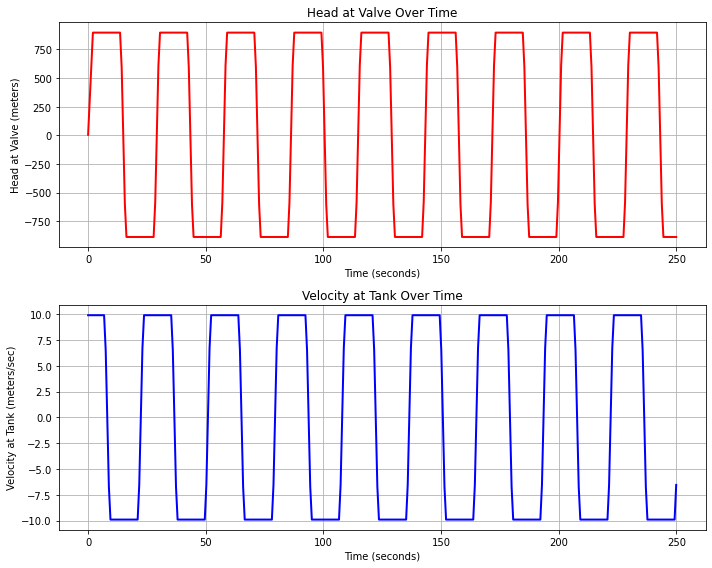

In [2]:
# Pipeline Transients using Explicit Finite Differences (linearized formulation)

import numpy as np
import matplotlib.pyplot as plt

# Function for calculating celerity
def celerity(density, elasticity_fluid, elasticity_solid, diameter, thickness):
    temp1 = 1.0 / elasticity_fluid
    temp2 = diameter / (elasticity_solid * thickness)
    temp3 = temp1 + temp2
    temp4 = density * temp3
    return np.sqrt(1.0 / temp4)

# Simulation conditions
# Fluid properties
density = 1000  # kg/m^3
elasticity_fluid = 2.0e9  # Pa
elasticity_solid = 160.0e9  # Pa
diameter = 0.500  # m
thickness = 0.004  # m
cc = celerity(density, elasticity_fluid, elasticity_solid, diameter, thickness)
print(f"Celerity: {cc} m/s")

# Simulation properties
deltax = 600  # meters
courant_ratio = 1.0  # select Courant ratio to set time step
deltat = courant_ratio * (deltax / cc)  # force to be Courant number for stability

# Allocate head and velocity vectors, assign initial values
start_head = 5.0  # meters
start_velo = 9.9  # meters/second
pipe_length = 6000  # meters
close_time = 2.0  # seconds
simulation_duration = 250  # seconds
friction_factor = 0.000  # Moody Chart
cell_count = int(pipe_length / deltax) + 1

head = np.full(cell_count, start_head)  # initial head values
velocity = np.full(cell_count, start_velo)  # initial velocity values

# Friction modified properties
if friction_factor > 0.0:
    courant_ratio = 0.99  # modify Courant ratio to set time step
    deltat = courant_ratio * (deltax / cc)  # force to be Courant number for stability
else:
    pass

# Useful constants
dtdx = deltat / deltax
cc2g = cc**2 / 9.81
do2 = 1.0 / (diameter * 2)  # used when friction included

# Allocate some output vectors
etime = [0]  # time steps
head_valve = [head[-1]]  # head at valve
velocity_tank = [velocity[0]]  # velocity at tank

# Time Stepping Loop
max_iter = int(1 + simulation_duration / deltat)

for itime in range(1, max_iter):
    etime.append(etime[-1] + deltat)
    
    # Valve closure model
    close_ratio = 1.0 - (etime[-1] / close_time)
    if close_ratio >= 0.0:
        velocity[-1] = close_ratio * np.sqrt(2 * 9.81 * head[0])
    else:
        velocity[-1] = 0.0
    
    # Update velocity
    for i in range(cell_count - 1):
        friction = friction_factor * velocity[i] * abs(velocity[i]) * do2
        velocity[i] -= 9.81 * dtdx * (head[i + 1] - head[i]) + deltat * friction
    
    # Update head
    for i in range(1, cell_count):
        head[i] -= cc2g * dtdx * (velocity[i] - velocity[i - 1])
    
    # Store results
    head_valve.append(head[-1])
    velocity_tank.append(velocity[0])

# Report results
print(f"Maximum head at valve: {max(head_valve)} meters")
print(f"Minimum head at valve: {min(head_valve)} meters")

# Plot results
plt.figure(figsize=(10, 8))

# Head at valve plot
plt.subplot(2, 1, 1)
plt.plot(etime, head_valve, 'r-', linewidth=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Head at Valve (meters)")
plt.title("Head at Valve Over Time")
plt.grid(True)

# Velocity at tank plot
plt.subplot(2, 1, 2)
plt.plot(etime, velocity_tank, 'b-', linewidth=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity at Tank (meters/sec)")
plt.title("Velocity at Tank Over Time")
plt.grid(True)

plt.tight_layout()
plt.show()

The script seems elaborate, but it is quite simple.  The major initial components are:

1. import numerical python (numpy) and plotting packages
2. Define a prototype function for the celerity. 
3. Next material properties and simulation characteristics are supplied.  

:::{note}
For the script to be more general, one would probably move a lot of these assignments into a file read structure.  
:::

Once everything is ready, the algorithm begins time-stepping. Within any single time step the following activities are performed:

1. Determine the downstream velocity at the valve based on the required closure model.
2. Update the velocity in each interior interface (1 to the section before the valve).
3. Update the head in each interior cell (2 to the last cell, which is upstream of the valve).
4. Record the head at the valve, and the velocity at the tank exit.
5. When the requisite time steps are completed, then report and plot the results.
 
For this particular example the friction factor was set to 0, and the Courant ratio was set to 1.

The head at the valve oscillates from $+\Delta~H$ to $-\Delta~H$, and the velocity repeatedly changes direction an value from +9.9 t0 -9.9 meters per second, exactly phase shifted relative to head by one-half cycle.
The time for the values to change is twice the pipeline length divided by the wave speed.

Now if we add the friction term say $f=0.015$ which would be a value for a smooth pipe (especially at the flow velocities in the example) the effect of frictional damping is evident in the simulation and is displayed below:

Celerity: 883.4522085987725 m/s
Maximum head at valve: 682.0901337595848 meters
Minimum head at valve: -384.6062306260657 meters


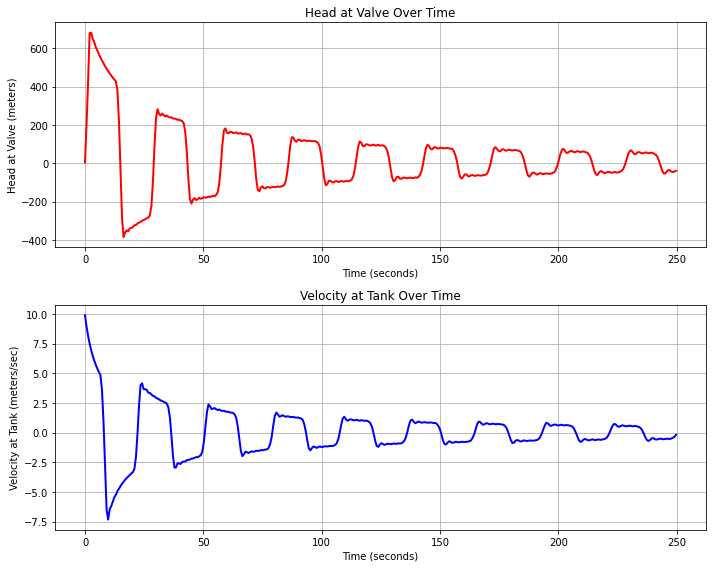

In [3]:
# Pipeline Transients using Explicit Finite Differences (linearized formulation)

import numpy as np
import matplotlib.pyplot as plt

# Function for calculating celerity
def celerity(density, elasticity_fluid, elasticity_solid, diameter, thickness):
    temp1 = 1.0 / elasticity_fluid
    temp2 = diameter / (elasticity_solid * thickness)
    temp3 = temp1 + temp2
    temp4 = density * temp3
    return np.sqrt(1.0 / temp4)

# Simulation conditions
# Fluid properties
density = 1000  # kg/m^3
elasticity_fluid = 2.0e9  # Pa
elasticity_solid = 160.0e9  # Pa
diameter = 0.500  # m
thickness = 0.004  # m
cc = celerity(density, elasticity_fluid, elasticity_solid, diameter, thickness)
print(f"Celerity: {cc} m/s")

# Simulation properties
deltax = 600  # meters
courant_ratio = 1.00  # select Courant ratio to set time step
deltat = courant_ratio * (deltax / cc)  # force to be Courant number for stability

# Allocate head and velocity vectors, assign initial values
start_head = 5.0  # meters
start_velo = 9.9  # meters/second
pipe_length = 6000  # meters
close_time = 2.0  # seconds
simulation_duration = 250  # seconds
friction_factor = 0.015  # Moody Chart
cell_count = int(pipe_length / deltax) + 1

head = np.full(cell_count, start_head)  # initial head values
velocity = np.full(cell_count, start_velo)  # initial velocity values

# Friction modified properties
if friction_factor > 0.0:
    courant_ratio = 0.96  # modify Courant ratio to set time step
    deltat = courant_ratio * (deltax / cc)  # force to be Courant number for stability
else:
    pass

# Useful constants
dtdx = deltat / deltax
cc2g = cc**2 / 9.81
do2 = 1.0 / (diameter * 2)  # used when friction included

# Allocate some output vectors
etime = [0]  # time steps
head_valve = [head[-1]]  # head at valve
velocity_tank = [velocity[0]]  # velocity at tank

# Time Stepping Loop
max_iter = int(1 + simulation_duration / deltat)

for itime in range(1, max_iter):
    etime.append(etime[-1] + deltat)
    
    # Valve closure model
    close_ratio = 1.0 - (etime[-1] / close_time)
    if close_ratio >= 0.0:
        velocity[-1] = close_ratio * np.sqrt(2 * 9.81 * head[0])
    else:
        velocity[-1] = 0.0
    
    # Update velocity
    for i in range(cell_count - 1):
        friction = friction_factor * velocity[i] * abs(velocity[i]) * do2
        velocity[i] -= 9.81 * dtdx * (head[i + 1] - head[i]) + deltat * friction
    
    # Update head
    for i in range(1, cell_count):
        head[i] -= cc2g * dtdx * (velocity[i] - velocity[i - 1])
    
    # Store results
    head_valve.append(head[-1])
    velocity_tank.append(velocity[0])

# Report results
print(f"Maximum head at valve: {max(head_valve)} meters")
print(f"Minimum head at valve: {min(head_valve)} meters")

# Plot results
plt.figure(figsize=(10, 8))

# Head at valve plot
plt.subplot(2, 1, 1)
plt.plot(etime, head_valve, 'r-', linewidth=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Head at Valve (meters)")
plt.title("Head at Valve Over Time")
plt.grid(True)

# Velocity at tank plot
plt.subplot(2, 1, 2)
plt.plot(etime, velocity_tank, 'b-', linewidth=2)
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity at Tank (meters/sec)")
plt.title("Velocity at Tank Over Time")
plt.grid(True)

plt.tight_layout()
plt.show()

## Laboratory Objectives
1. Configure the water hammer apparatus to measure heads at the pipeline midpoint.
2. Develop an experimental protocol (step-by-step instructions) to measure heads at the midpoint in the pipeline for a rapid valve closure, and to estimate initial velocity in the pipeline before the closure.
3. Upon approval of the protocol, conduct a set of experiments in triplicate to measure the head versus time at the pipeline midpoint.
4. Modify the script(s) above to predict the head/pressure in the pipeline at the midpoint using the actual material properties, geometric properties, and the hydraulic settings of the water hammer experimental apparatus.
5. Document the experiment(s) into a laboratory report and comment on the fidelity of the numerical model's ability to replicate actual measurements.